<a href="https://colab.research.google.com/github/GeminiNetSailor/Data-science-and-analytics/blob/main/9.2%20Actividad%209.%20Regresi%C3%B3n%20log%C3%ADstica/Actividad9RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: David A. Serrano Garcia
*   MATRÍCULA: A01795935
*   NOMBRE: Said Chávez Cervantes
*   MATRÍCULA: A01114101
*   NOMBRE: Erik Abel Cruz Yekon
*   MATRÍCULA: A01795929

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.stats import skew

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [6]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [8]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [9]:
# prompt: a) Estadísticas descriptivas para todas las variables del dataframe.

data_df.describe().T


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [10]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [11]:
# prompt:

data_df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

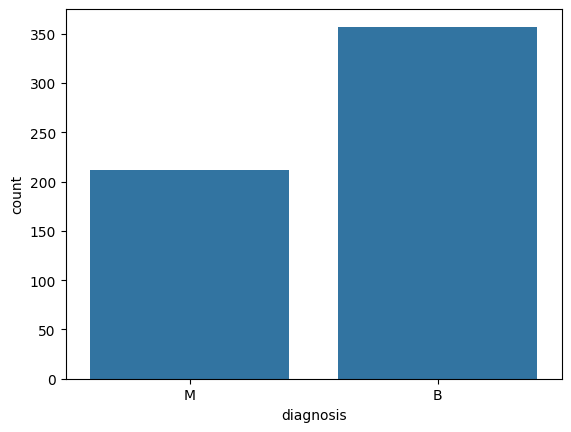

In [12]:
# prompt:

import matplotlib.pyplot as plt
sns.countplot(x = 'diagnosis', data = data_df)
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

In [13]:
# Get the numerical columns
numeric_cols = data_df.select_dtypes(include=['int64', 'float64']).columns

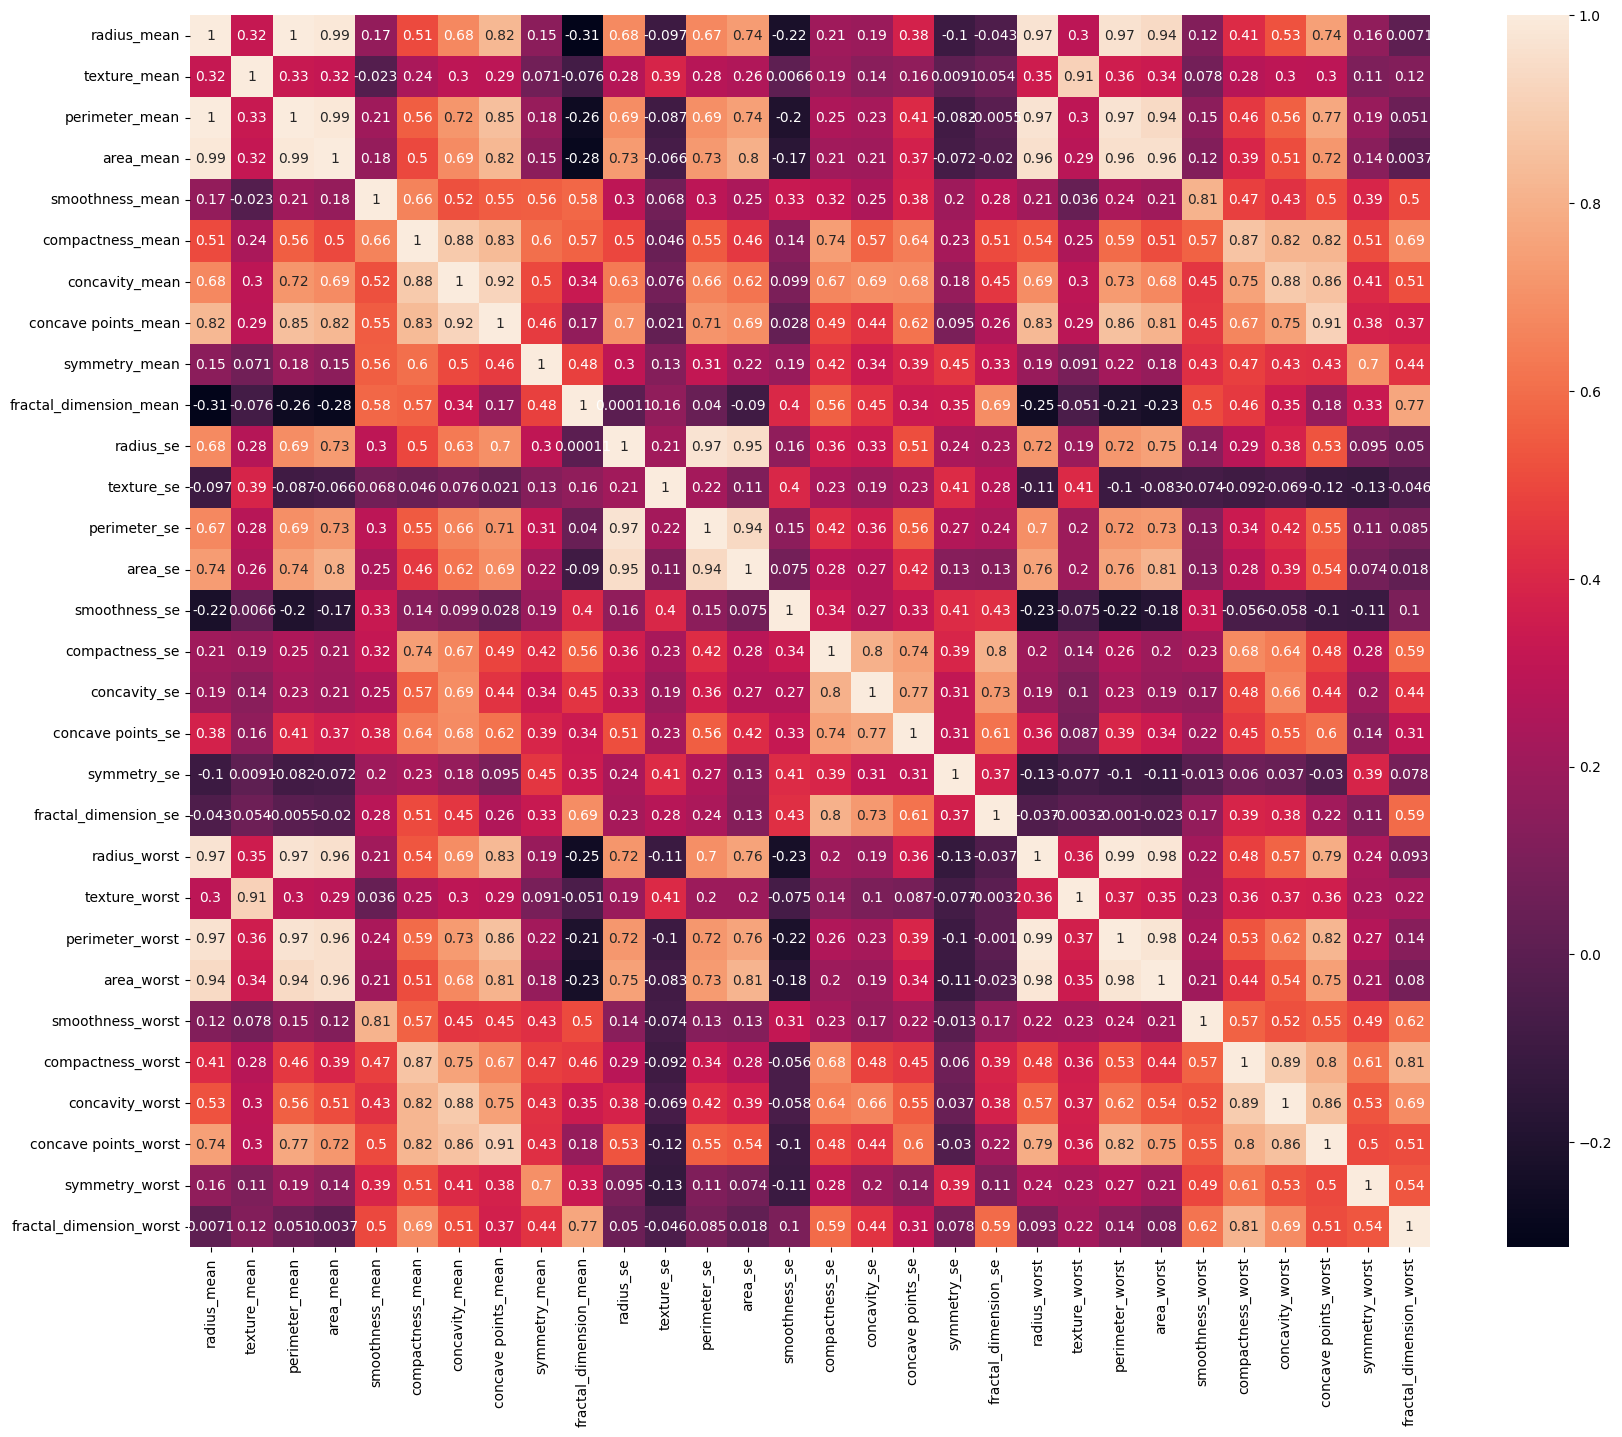

In [14]:
# Compute the correlation matrix
correlation_matrix = data_df[numeric_cols].corr()

# Generate the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

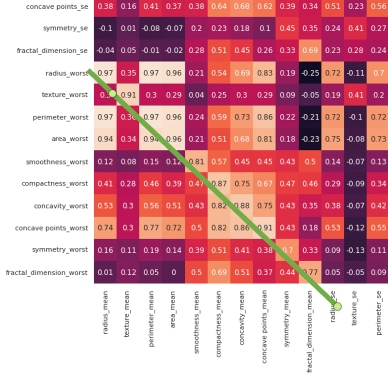

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [15]:
drop_worst_columns = [col for col in data_df.columns if col.endswith('_worst')]

In [16]:
data_df = data_df.drop(columns=drop_worst_columns)
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




In [17]:
# Nota: cambie el orden despues de visualizar las relaciones lineales
mean_columns = [
        'radius_mean', 'perimeter_mean', 'area_mean',
        'compactness_mean', 'concavity_mean','concave points_mean',
        'texture_mean',
        'smoothness_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

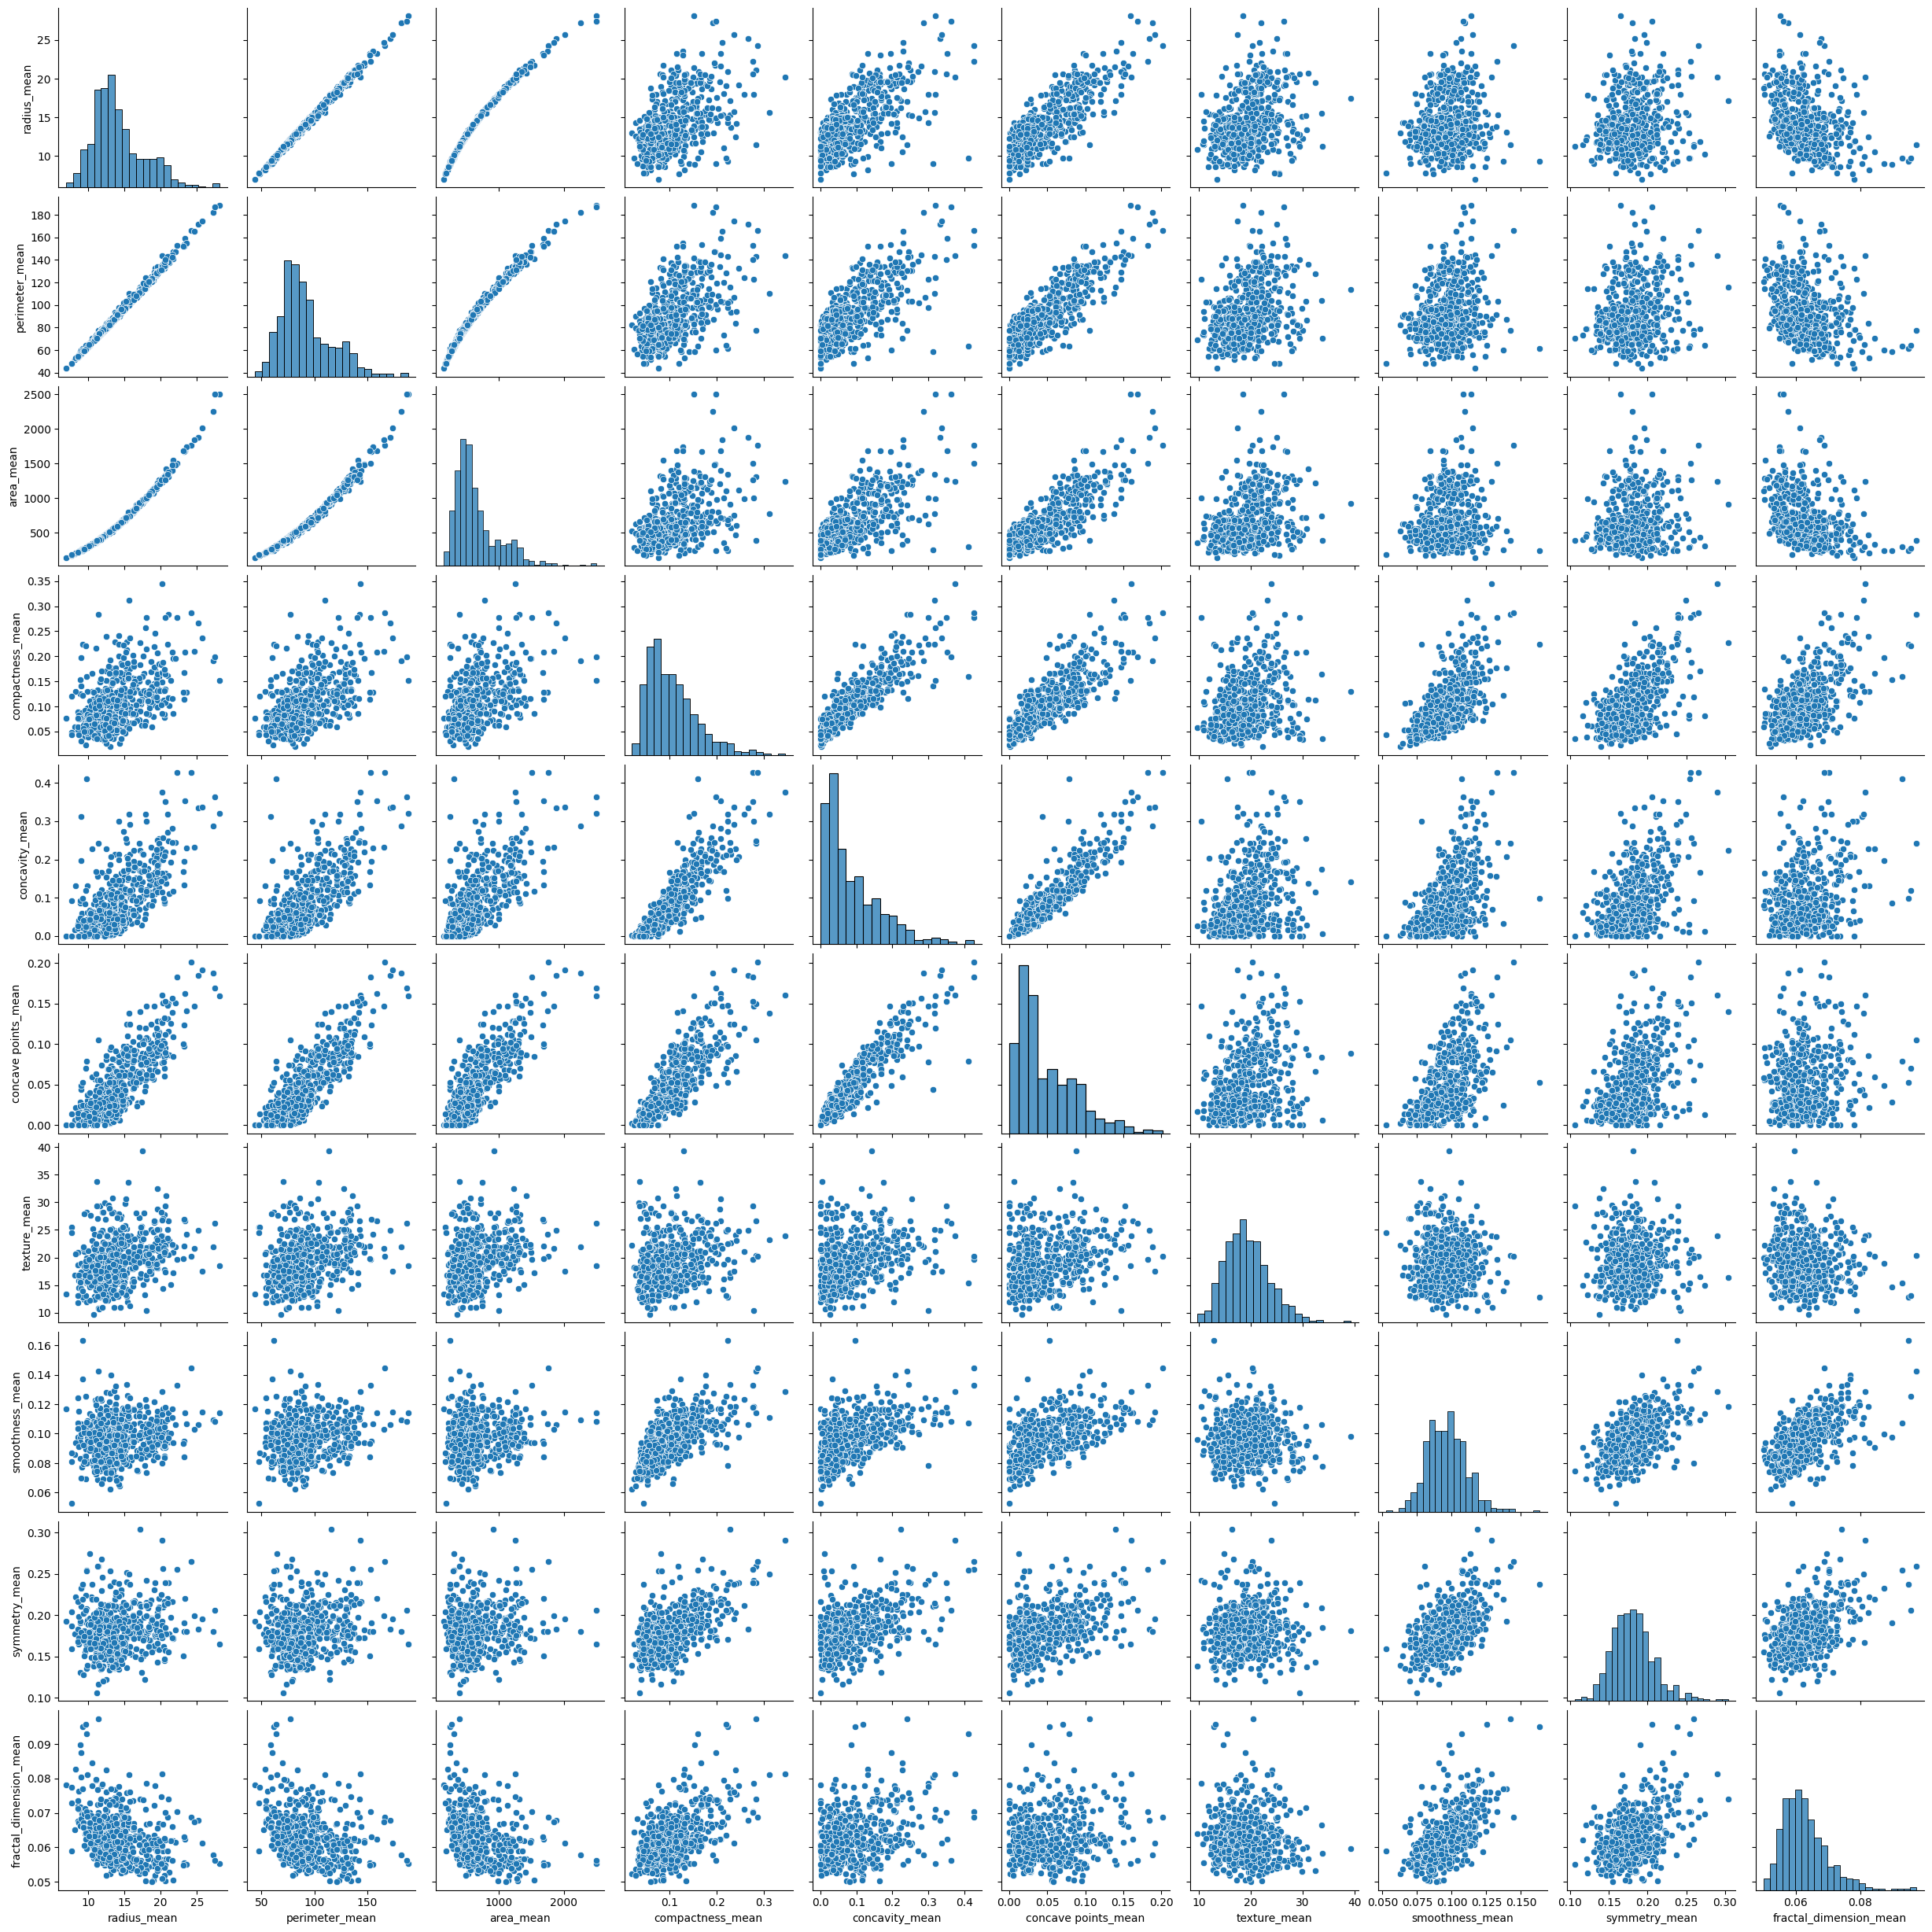

In [18]:
sns.pairplot(data=data_df[mean_columns])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


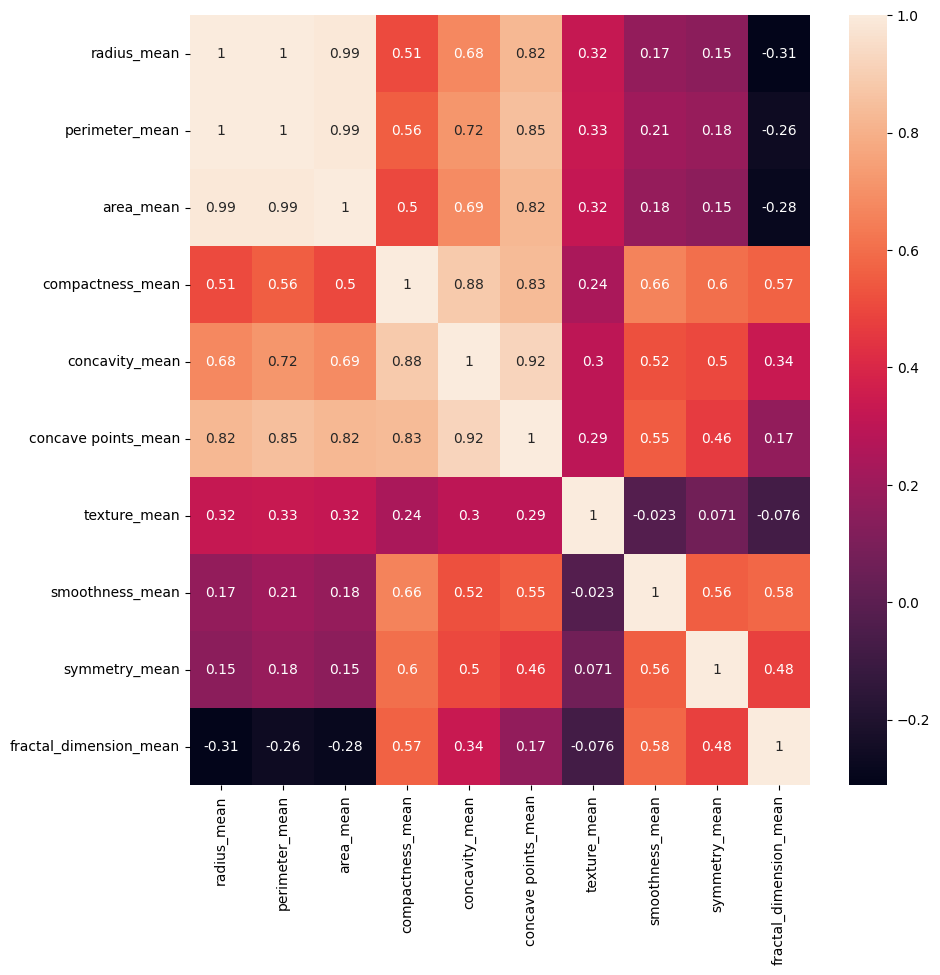

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df[mean_columns].corr(), annot=True)
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [20]:
drop_columns =  ['perimeter_mean','area_mean','concavity_mean','concave points_mean']
drop_columns

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

In [21]:
drop_columns += [col.replace('_mean', '_se') for col in drop_columns if col.replace('_mean', '_se') in data_df.columns and col.replace('_mean', '_se') not in drop_columns]
drop_columns

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'concave points_se']

In [22]:
data_df = data_df.drop(columns=drop_columns)

In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


In [24]:
data_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [25]:
# Filtrar la lista para asegurarte de que solo se intenten eliminar columnas que existen en el DataFrame
columns_to_drop = [col for col in drop_columns if col in data_df.columns]

In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


In [27]:
data_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [28]:
# Get the numerical columns
numeric_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
len(numeric_cols)

12

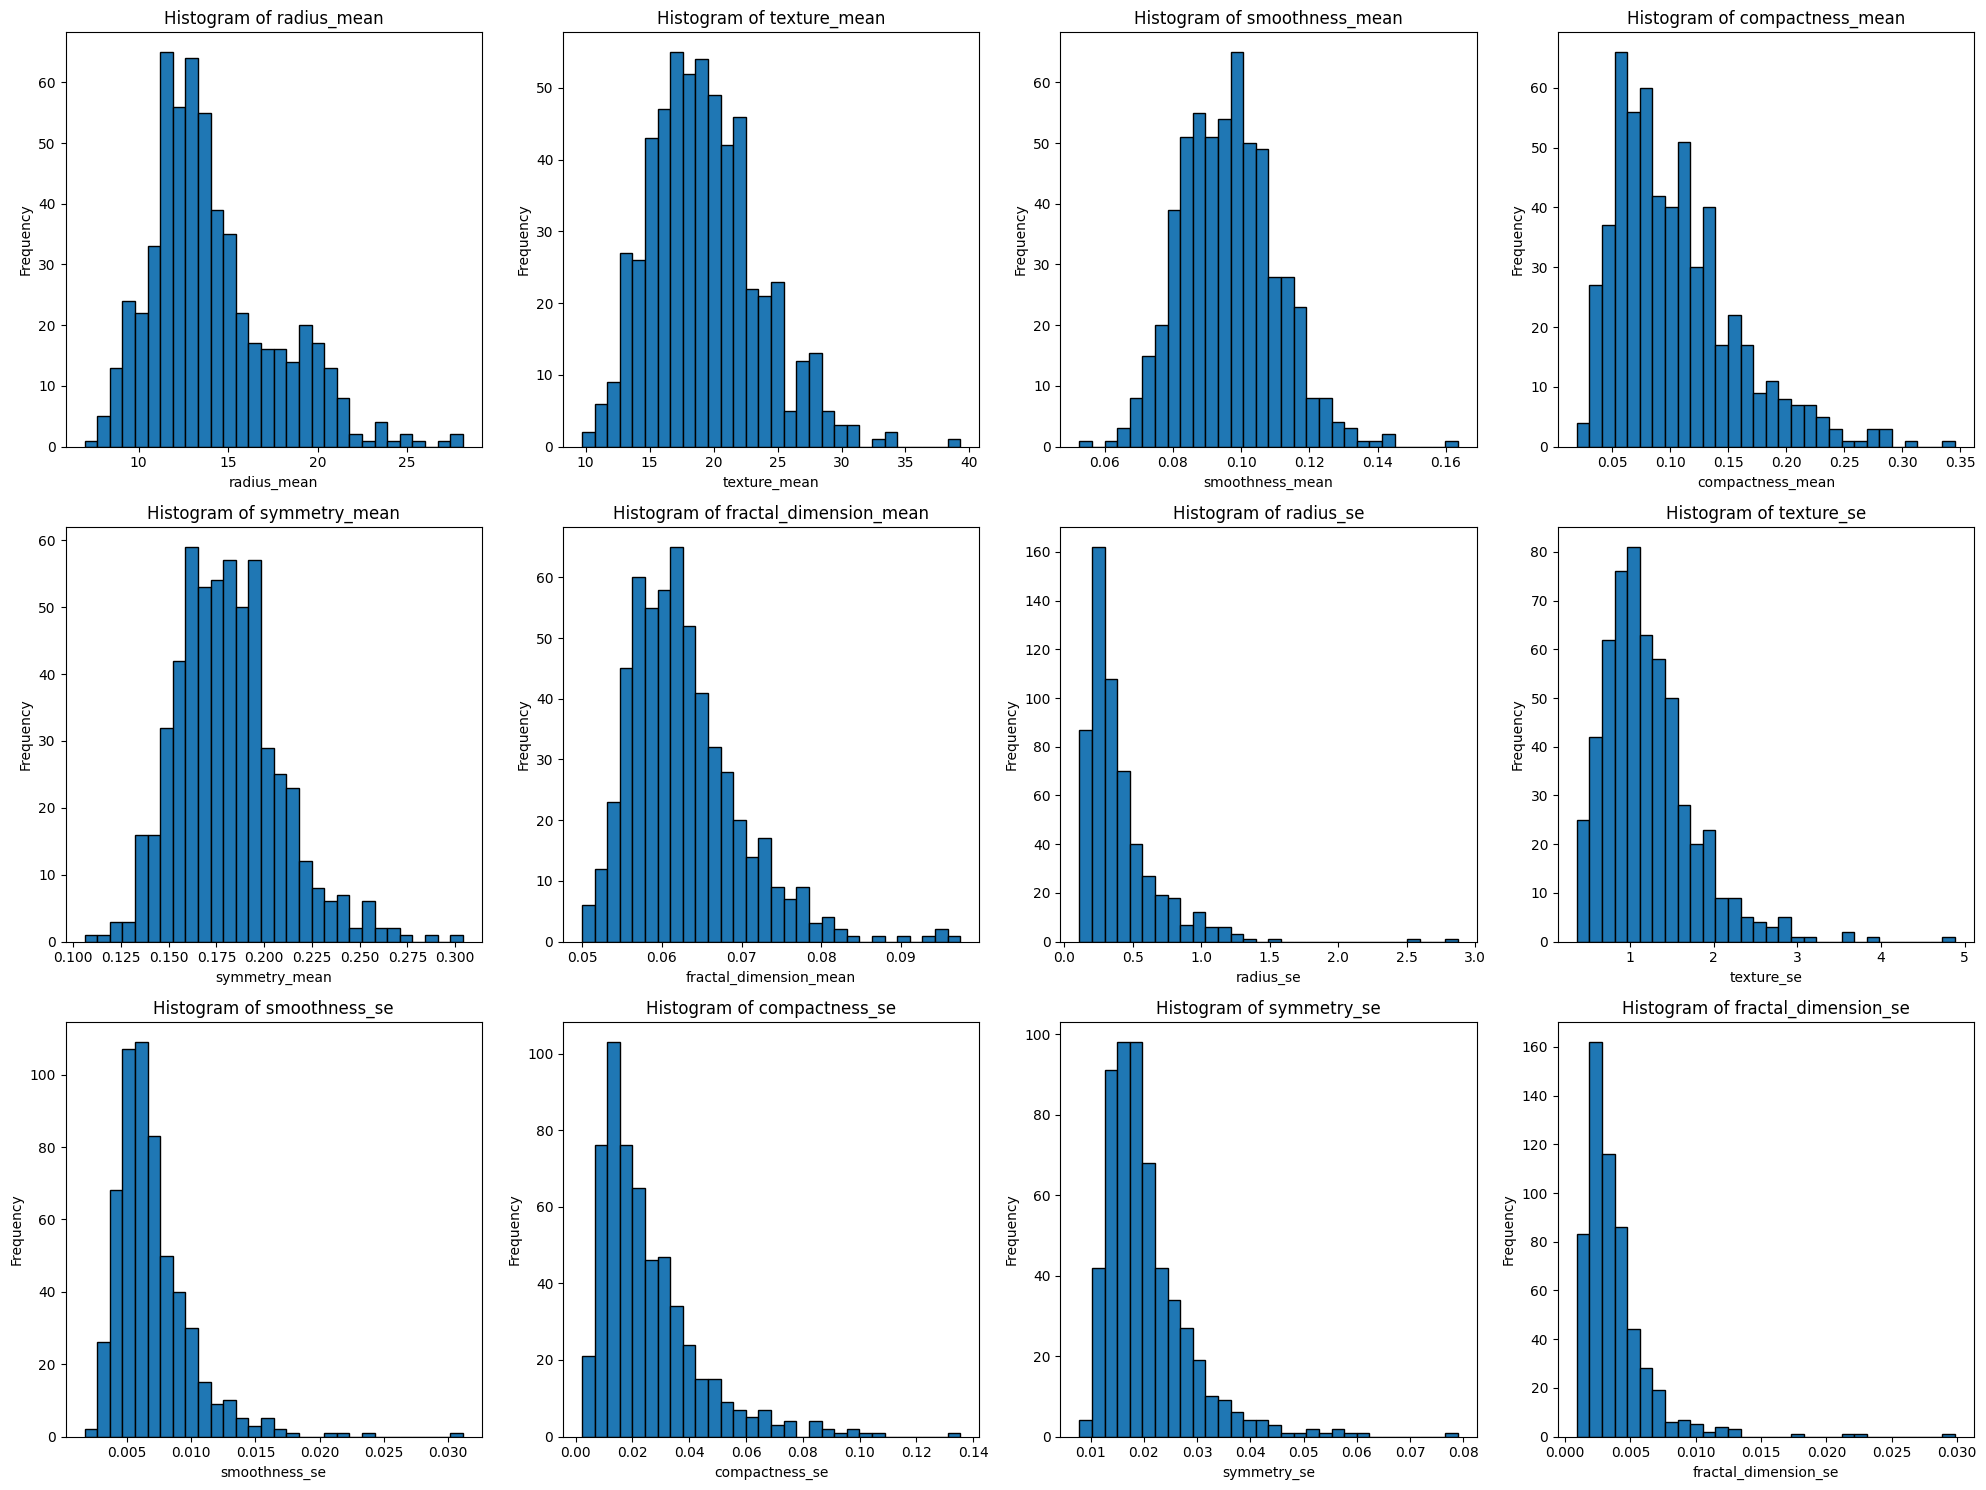

In [29]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Genera histogramas para las columnas con sesgo positivo
for ax, col in zip(axes, numeric_cols):
    ax.hist(data_df[col].dropna(), bins=30, edgecolor='k')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Elimina los ejes sobrantes si hay menos de n_rows*n_cols columnas
for ax in axes[len(numeric_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [30]:
# Selecciona las columnas con skewness mayor a 1 entre las columnas numéricas
skew_cols = [col for col in numeric_cols if skew(data_df[col]) > 1]
print(len(skew_cols))
# Imprime las columnas seleccionadas
print("Columns with skewness > 1:", skew_cols)

8
Columns with skewness > 1: ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


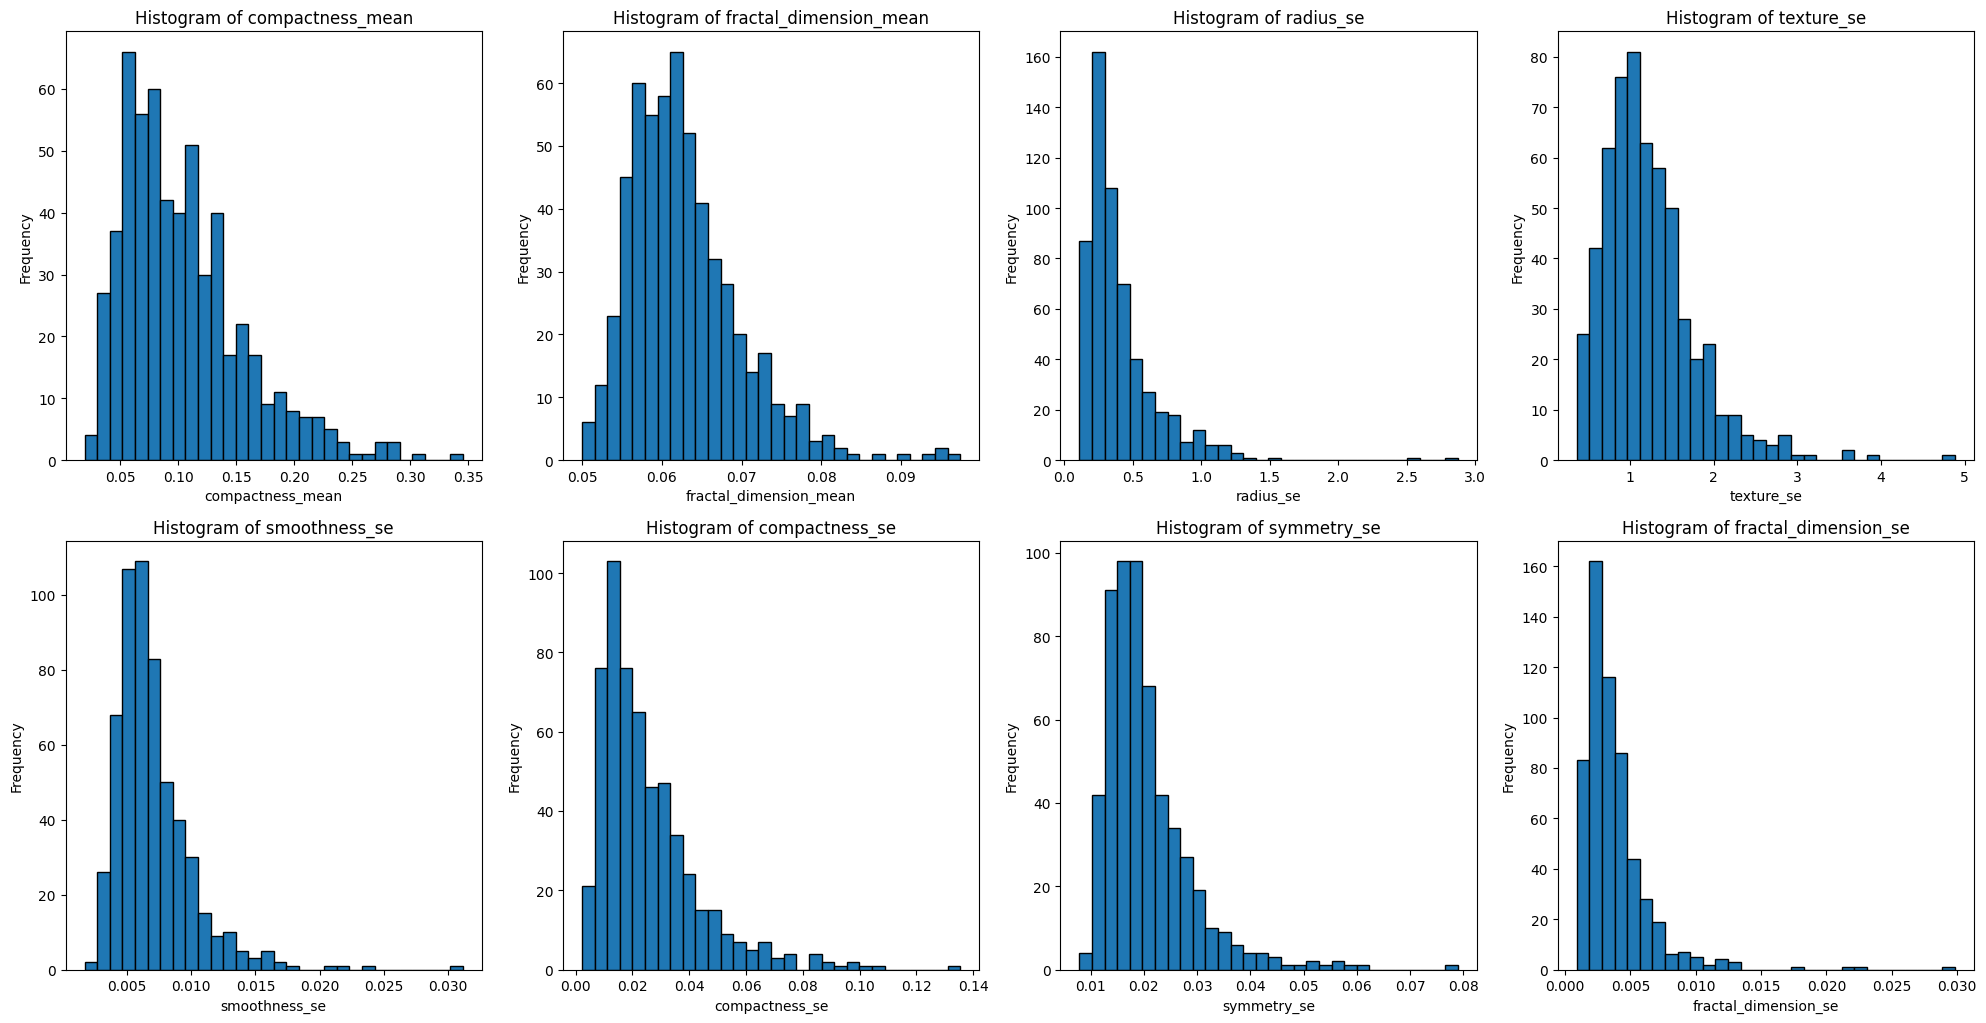

In [31]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Genera histogramas para las columnas con sesgo positivo
for ax, col in zip(axes, skew_cols):
    ax.hist(data_df[col].dropna(), bins=30, edgecolor='k')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Elimina los ejes sobrantes si hay menos de n_rows*n_cols columnas
for ax in axes[len(skew_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


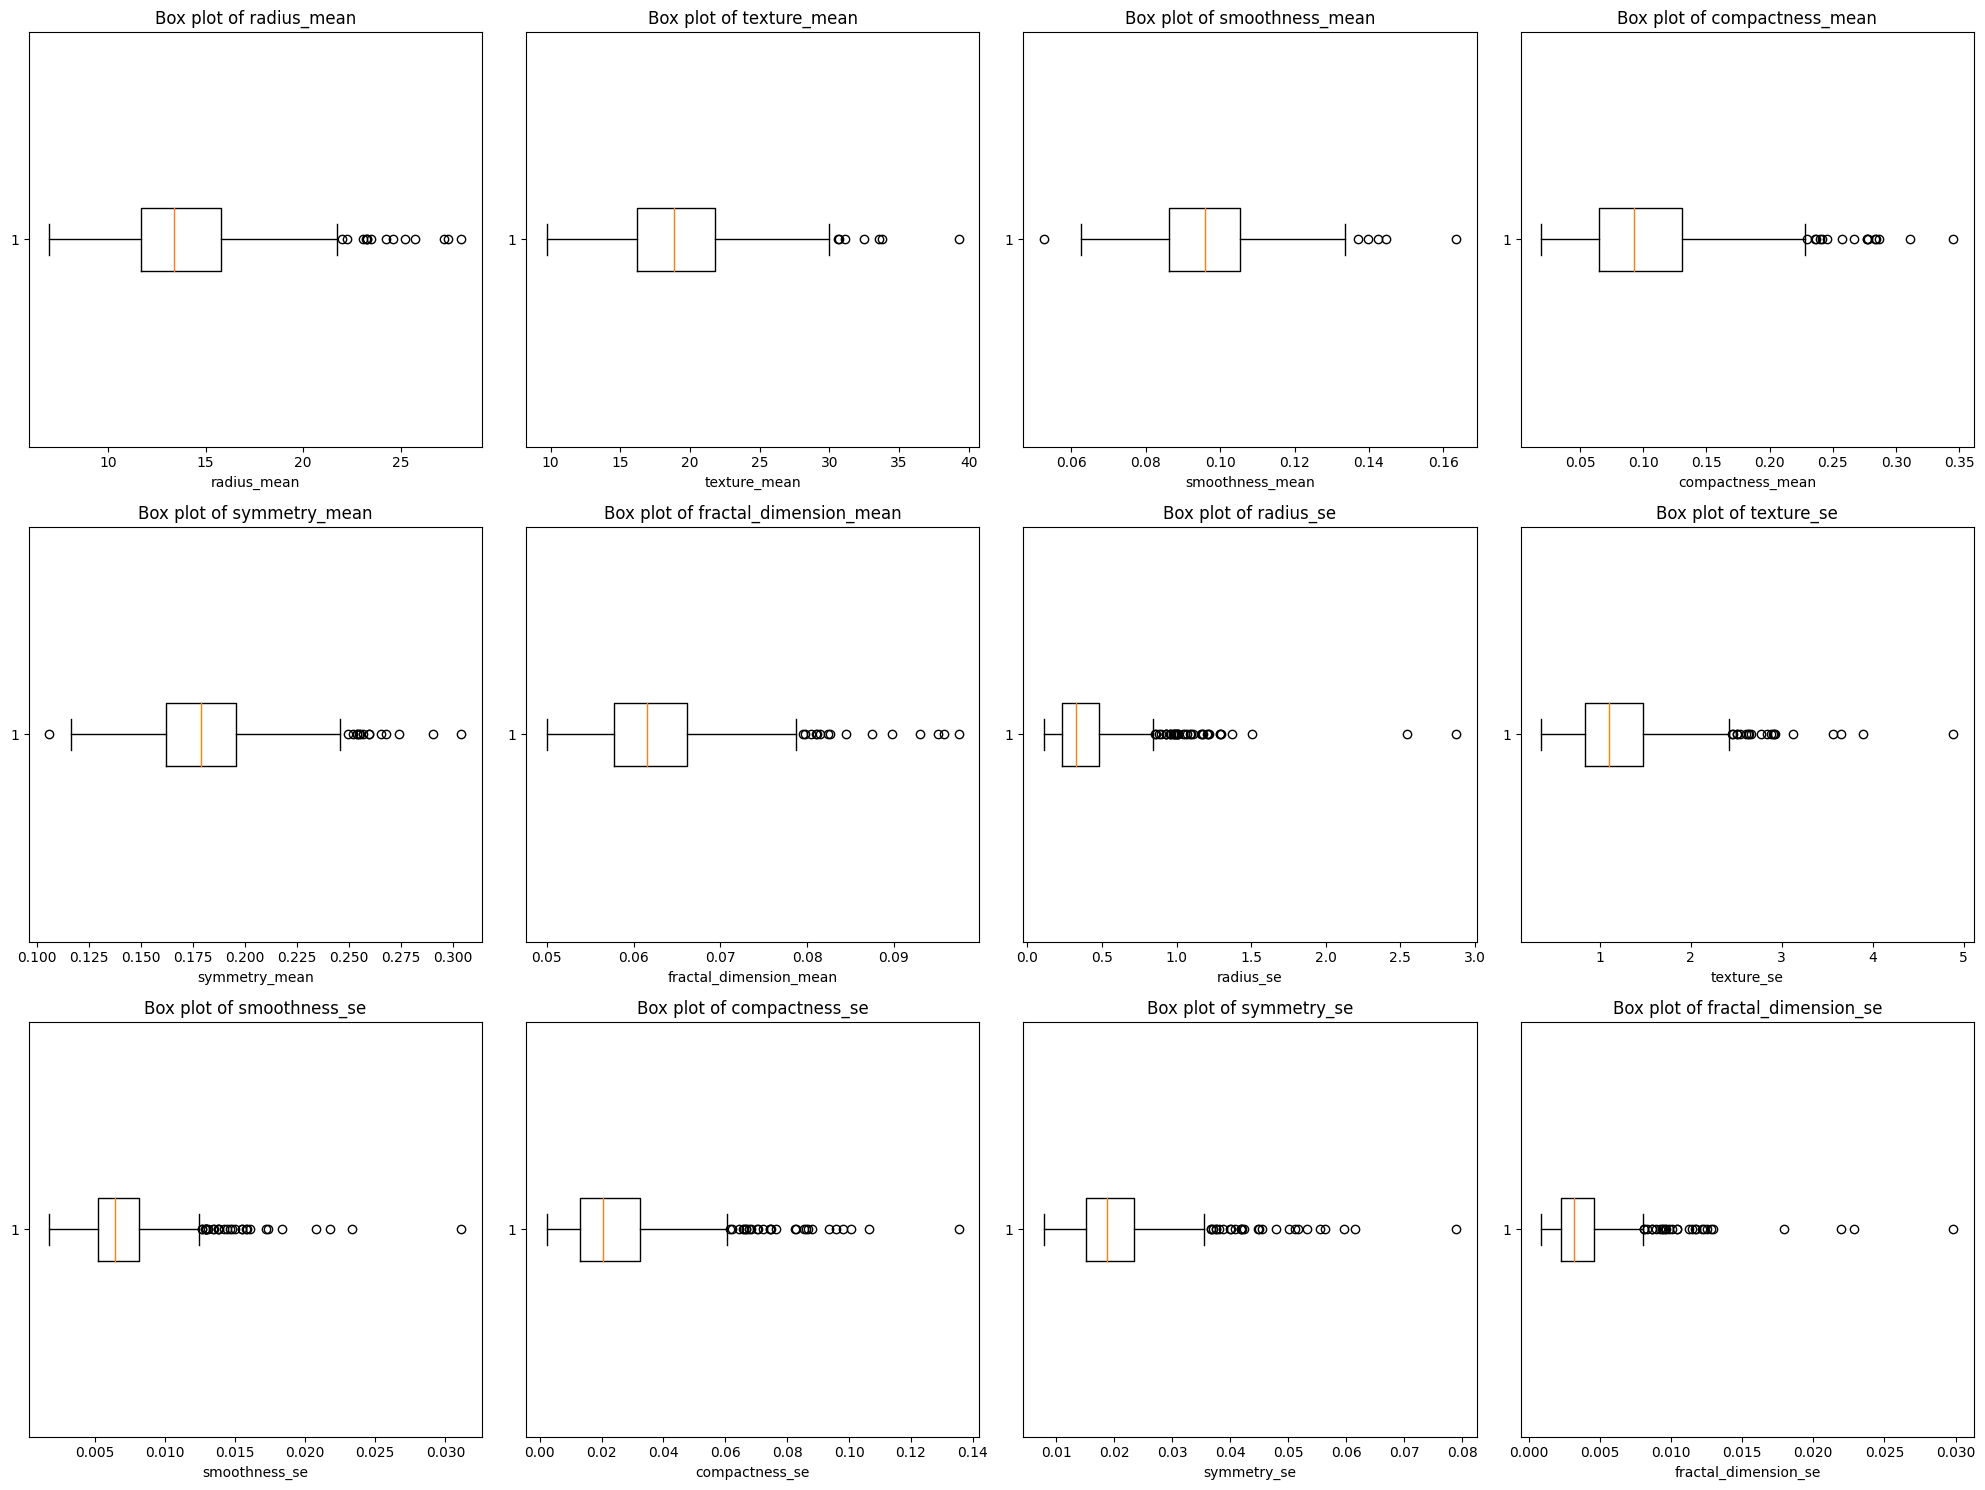

Columns that need scaling (not in [0,1]): ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


In [32]:
# Crear una lista para guardar las columnas que necesitan escalado
scale_cols = []

# Crear una figura con una cuadrícula de gráficos
n_cols = 4
n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols != 0 else 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Generar box plots para todas las columnas numéricas
for ax, col in zip(axes, numeric_cols):
    ax.boxplot(data_df[col].dropna(), vert=False)
    ax.set_title(f'Box plot of {col}')
    ax.set_xlabel(col)

    # Verificar si los valores de la columna están en el intervalo [0,1]
    if data_df[col].min() < 0 or data_df[col].max() > 1:
        scale_cols.append(col)

# Eliminar los ejes sobrantes si hay menos columnas que la cuadrícula
for ax in axes[len(numeric_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

# Imprimir las columnas que necesitan escalado
print("Columns that need scaling (not in [0,1]):", scale_cols)


In [33]:
# Selecciona las columnas que no están en el intervalo [0,1]
scale_cols = [col for col in numeric_cols if (data_df[col].max() > 1 or data_df[col].min() < 0)]
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [34]:
# Lee el contenido del archivo
df = pd.read_csv('data.csv', index_col='id')

# Separa las variables
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Divide el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Imprime las dimensiones de los conjuntos
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (455, 30)
X_test: (114, 30)
y_train: (455,)
y_test: (114,)


In [35]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
90524101,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
89346,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
902975,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
904969,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [36]:
y_train.head()

id
90524101    M
84358402    M
89346       B
902975      B
904969      B
Name: diagnosis, dtype: object

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [37]:
print('Columnas a remover: ',len(drop_worst_columns + drop_columns))

# Crear el transformador de columnas
# =========
# En ColumnTransformer, el tercer argumento en cada tupla del parámetro transformers
# indica las columnas a las que se debe aplicar el transformador. Puedes usar:
#
# - Una lista de nombres de columnas.
# - Una lista de índices de columnas.
# - Un objeto slice para definir un rango de columnas.
#
# Al usar slice(0, None), estás indicando que el transformador debe aplicarse a todas las columnas
# desde la primera hasta la última. Esto es útil cuando quieres aplicar una transformación que afecta
# potencialmente a todas las columnas, pero luego se gestiona internamente qué columnas modificar o dejar intactas.
# =========

# Guardar la tupla del transformador en una variable
drop_columns_transformer = ('drop_columns', FunctionTransformer(lambda X: X.drop(columns= drop_worst_columns + drop_columns)), slice(0, None))

preprocessing = ColumnTransformer(
    transformers=[
        drop_columns_transformer
    ],
    remainder='passthrough'
)
print(preprocessing.transformers)

Columnas a remover:  18
[('drop_columns', FunctionTransformer(func=<function <lambda> at 0x78c2c29b80d0>), slice(0, None, None))]


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva.

 En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva.

 Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación.

 Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [38]:
# Entrena el modelo con el transformador y regresión logística
logr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression())
])

logr_model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = logr_model.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred, labels=['B','M']))

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, pos_label='M'))
print('Precision:', precision_score(y_test, y_pred, pos_label='M'))


Confusion matrix:
[[68  4]
 [10 32]]
Accuracy: 0.8771929824561403
Recall: 0.7619047619047619
Precision: 0.8888888888888888


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [39]:
preprocessing = ColumnTransformer(
    transformers = [
        drop_columns_transformer,
        #('sqrt_transform', PowerTransformer(method='yeo-johnson'), skew_cols),
        ('sqrt_transform', FunctionTransformer(lambda X: np.sqrt(X)), skew_cols),
        ('minmax_transform', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

# Imprimir transformadores en formato de filas
print("Transformers in ColumnTransformer:")
for name, transformer, columns in preprocessing.transformers:
    print(f"Name: {name}")
    print(f"Transformer: {transformer}")
    print(f"Columns: {columns}")
    print("-" * 40)

Transformers in ColumnTransformer:
Name: drop_columns
Transformer: FunctionTransformer(func=<function <lambda> at 0x78c2c29b80d0>)
Columns: slice(0, None, None)
----------------------------------------
Name: sqrt_transform
Transformer: FunctionTransformer(func=<function <lambda> at 0x78c2c29b9510>)
Columns: ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']
----------------------------------------
Name: minmax_transform
Transformer: MinMaxScaler()
Columns: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']
----------------------------------------


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [40]:
# Entrena el modelo con el transformador y regresión logística
logr_model2 = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression())
])

logr_model2.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred2 = logr_model2.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred2, labels=['B','M']))

print('Accuracy:', accuracy_score(y_test, y_pred2))
print('Recall:', recall_score(y_test, y_pred2, pos_label='M'))
print('Precision:', precision_score(y_test, y_pred2, pos_label='M'))

Confusion matrix:
[[68  4]
 [10 32]]
Accuracy: 0.8771929824561403
Recall: 0.7619047619047619
Precision: 0.8888888888888888


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [41]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [42]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
number_of_components = (cumulative_explained_variance <= 0.99).sum() + 1


print(f"Number of components that explain 99% of the variance: {number_of_components}")

principal_components = pca.components_
# Crear un DataFrame para los componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[0])]
components_df = pd.DataFrame(principal_components, columns=X.columns, index=columns)

# Mostrar los componentes principales
# print(components_df)

# Para mostrar los componentes que explican el 99% de la varianza
#print(components_df.iloc[:number_of_components].T)

Number of components that explain 99% of the variance: 17


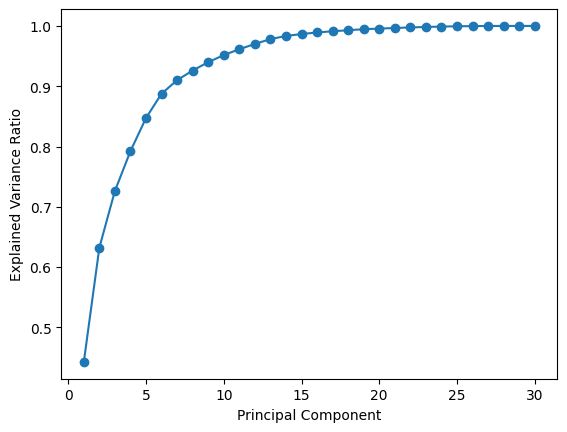

In [43]:
# Visualizar la varianza explicada por cada componente principal
plt.plot(range(1, len(X_train.columns) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [46]:
# Construir el modelo con PCA
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=number_of_components)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
logr_model3.fit(X_train, y_train)

# Evaluar el modelo
y_pred3 = logr_model3.predict(X_test)



print('Confusion matrix:')
print(confusion_matrix(y_test, y_prob, labels=['B', 'M']))

print('Accuracy:', accuracy_score(y_test, y_prob))
print('Recall:', recall_score(y_test, y_prob, pos_label='M'))
print('Precision:', precision_score(y_test, y_prob, pos_label='M'))

Confusion matrix:
[[72  0]
 [ 2 40]]
Accuracy: 0.9824561403508771
Recall: 0.9523809523809523
Precision: 1.0


In [ ]:
# Construir el modelo con PCA
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=number_of_components)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
logr_model3.fit(X_train, y_train)

# Evaluar el modelo
y_pred3 = logr_model3.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred3, labels=['B', 'M']))

print('Accuracy:', accuracy_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3, pos_label='M'))
print('Precision:', precision_score(y_test, y_pred3, pos_label='M'))

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

**Recall (Sensibilidad).**
Esto se debe a que la prioridad en un contexto médico es minimizar los falsos negativos, es decir, los casos en los que una enfermedad está presente pero no es detectada por el modelo. Un falso negativo puede tener consecuencias graves, ya que un paciente que necesita tratamiento no lo recibiría.

**Disminuir el umbral de decisión del modelo**. **Esto significa que el modelo clasificará más ejemplos como positivos, lo que aumenta la detección de verdaderos positivos pero también puede aumentar los falsos positivos.**



In [47]:
# Obtener las probabilidades predichas
y_prob = logr_model3.predict_proba(X_test)[:, 1]

# Ajustar el umbral de decisión
threshold = 0.05  # Por ejemplo, reducir el umbral para aumentar recall
y_pred_threshold = np.where(y_prob >= threshold, 'M', 'B')

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_threshold, labels=['B', 'M']))

print('Accuracy:', accuracy_score(y_test, y_pred_threshold))
print('Recall:', recall_score(y_test, y_pred_threshold, pos_label='M'))
print('Precision:', precision_score(y_test, y_pred_threshold, pos_label='M'))

Confusion matrix:
[[65  7]
 [ 0 42]]
Accuracy: 0.9385964912280702
Recall: 1.0
Precision: 0.8571428571428571
